In [1]:
import plotly.plotly as py
import plotly.tools as tls

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

import datetime as dt

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

import sqlalchemy
# =========== base classification ===========
from sqlalchemy.ext.declarative import declarative_base
# =======================================================
from sqlalchemy.orm import Session
from sqlalchemy import and_, Column, create_engine, Date, distinct,Integer, Float, ForeignKey, func, inspect, MetaData, String

import seaborn as sns

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# =======================================================
# declarative_base
# =======================================================

Base = declarative_base()

class Measurement(Base):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station = Column(String(255), ForeignKey('station.station'))
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)
    
class Station(Base):
    __tablename__ = "station"
    station = Column(Integer, primary_key = True)
    name = Column(String(255))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
# reflect an existing database into a new model
Base.metadata.create_all(engine)

# create inspector and session
session = Session(bind=engine)

_____
BOOKMARK END *** ***
_____

In [4]:
 session.query(func.max(Measurement.date)).all()[0][0]

datetime.date(2017, 8, 23)

In [5]:
# ------------------------
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# ------------------------

# calculate latest date
log_date = session.query(func.max(Measurement.date)).all()[0][0]
# subtract 1 year
log_date = log_date- dt.timedelta(days = 365)

past_year = session.query(
    Station.name,
    Station.latitude,
    Station.longitude,
    Station.elevation,    
    Station.station,
    Measurement.id,
    Measurement.station,
    Measurement.date,
    Measurement.prcp,
    Measurement.tobs
).join(Measurement).filter(Measurement.date >= log_date).all()

In [6]:
id = []
station = []
date = []
prcp = []
tobs = []
name = []
latitude = []
longitude = []
elevation = []

for row in past_year:
	id.append(row.id)
	station.append(row.station)
	date.append(row.date)
	prcp.append(row.prcp)
	tobs.append(row.tobs)
	name.append(row.name)
	latitude.append(row.latitude)
	longitude.append(row.longitude)
	elevation.append(row.elevation)
    
    
last_12 = pd.DataFrame({
    'id' : id,
    'station' : station,
    'name' : name,
    'date' : date,
    'precipitation' : prcp,
    'tobs' : tobs,
    'latitude' : latitude,
    'longitude' : longitude,
    'elevation' : elevation
})

last_12['precipitation'] = last_12['precipitation'].fillna(0)

# last_12['date'] = pd.to_datetime(last_12['date'], infer_datetime_format = True)

# sort data frame by date column for time series plotting
last_12 = last_12.sort_values(by = ['date']).set_index('date')
last_12.head()

,id,station,name,precipitation,tobs,latitude,longitude,elevation
date,,,,,,,,
2016-08-23,2364,USC00519397,"WAIKIKI 717.2, HI US",0.00,81.0,21.27160,-157.81680,3.0
2016-08-23,8825,USC00517948,"PEARL CITY, HI US",0.00,80.0,21.39340,-157.97510,11.9
2016-08-23,14608,USC00519281,"WAIHEE 837.5, HI US",1.79,77.0,21.45167,-157.84889,32.9
2016-08-23,7331,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.05,80.0,21.52130,-157.83740,7.0
2016-08-23,5091,USC00513117,"KANEOHE 838.1, HI US",0.15,76.0,21.42340,-157.80150,14.6


In [30]:
last_12.index.dtype

dtype('O')

In [7]:
data = [go.Scatter(x= last_12.index, y = last_12.precipitation)]

layout = go.Layout(
    title='Past 12 Month Precipitation',
    xaxis=dict(
        title='Dates',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        showticklabels=True,
        tickangle=90
    ),
    yaxis=dict(
        title='Precipitation %',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [8]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12['precipitation'].describe()

count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: precipitation, dtype: float64

In [9]:
session.query(
    Station.station,
).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [10]:
full_frame = session.query(
    Station.name,
    Station.latitude,
    Station.longitude,
    Station.elevation,    
    Measurement.id,
    Measurement.station,
    Measurement.date,
    Measurement.prcp,
    Measurement.tobs
).join(Measurement).all()

id = []
station = []
date = []
prcp = []
tobs = []
name = []
latitude = []
longitude = []
elevation = []

for row in full_frame:
	id.append(row.id)
	station.append(row.station)
	date.append(row.date)
	prcp.append(row.prcp)
	tobs.append(row.tobs)
	name.append(row.name)
	latitude.append(row.latitude)
	longitude.append(row.longitude)
	elevation.append(row.elevation)
    
full_df = pd.DataFrame({
    'id' : id,
    'station' : station,
    'name' : name,
    'date' : date,
    'precipitation' : prcp,
    'tobs' : tobs,
    'latitude' : latitude,
    'longitude' : longitude,
    'elevation' : elevation
})

full_df['precipitation'] = full_df['precipitation'].fillna(0)

# last_12['date'] = pd.to_datetime(last_12['date'], infer_datetime_format = True)

# sort data frame by date column for time series plotting
full_df = full_df.sort_values(by = ['date']).reset_index(drop=True)
full_df.head()

,id,station,name,date,precipitation,tobs,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",2010-01-01,0.08,65.0,21.27160,-157.81680,3.0
1,9008,USC00518838,"UPPER WAHIAWA 874.3, HI US",2010-01-01,0.21,72.0,21.49920,-158.01110,306.6
2,9519,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2010-01-01,0.15,75.0,21.33556,-157.71139,19.5
3,12188,USC00519281,"WAIHEE 837.5, HI US",2010-01-01,0.15,70.0,21.45167,-157.84889,32.9
4,14960,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",2010-01-01,0.05,66.0,21.31520,-157.99920,0.9


In [11]:
# How many stations are available in this dataset?
session.query(
    func.count(distinct(Measurement.station))
).all()[0][0]

9

In [12]:
# What are the most active stations?
session.query(
    distinct(Measurement.station),
    func.count(Measurement.station)
).group_by(
    Measurement.station    
).order_by(
    func.count(Measurement.station).desc()
).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

_____
BOOKMARK *** ***
_____

In [13]:
from sqlalchemy import inspect
inst = inspect(Measurement)
attr_names = [c_attr.key for c_attr in inst.mapper.column_attrs]
attr_names

['id', 'station', 'date', 'prcp', 'tobs']

In [14]:
# calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_most_records = session.query(
    Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).group_by(
    Measurement.station    
).order_by(
    func.count(Measurement.station).desc()
).first()
station_most_records

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_records = session.query(
    Station.name,
    Station.latitude,
    Station.longitude,
    Station.elevation,    
    Station.station,
    Measurement.id,
    Measurement.station,
    Measurement.date,
    Measurement.prcp,
    Measurement.tobs
).join(Measurement).filter(
    Measurement.station == station_most_records[0]
).filter(Measurement.date > log_date).all()

In [16]:
id = []
station = []
date = []
prcp = []
tobs = []
name = []
latitude = []
longitude = []
elevation = []

for row in most_records:
	id.append(row.id)
	station.append(row.station)
	date.append(row.date)
	prcp.append(row.prcp)
	tobs.append(row.tobs)
	name.append(row.name)
	latitude.append(row.latitude)
	longitude.append(row.longitude)
	elevation.append(row.elevation)
    
    
records_last_12 = pd.DataFrame({
    'id' : id,
    'station' : station,
    'name' : name,
    'date' : date,
    'precipitation' : prcp,
    'tobs' : tobs,
    'latitude' : latitude,
    'longitude' : longitude,
    'elevation' : elevation
})

records_last_12['precipitation'] = records_last_12['precipitation'].fillna(0)

# last_12['date'] = pd.to_datetime(last_12['date'], infer_datetime_format = True)

# sort data frame by date column for time series plotting
records_last_12 = records_last_12.sort_values(by = ['date']).set_index('date')
records_last_12.head()

,id,station,name,precipitation,tobs,latitude,longitude,elevation
date,,,,,,,,
2016-08-24,14609,USC00519281,"WAIHEE 837.5, HI US",2.15,77.0,21.45167,-157.84889,32.9
2016-08-25,14610,USC00519281,"WAIHEE 837.5, HI US",0.06,80.0,21.45167,-157.84889,32.9
2016-08-26,14611,USC00519281,"WAIHEE 837.5, HI US",0.01,80.0,21.45167,-157.84889,32.9
2016-08-27,14612,USC00519281,"WAIHEE 837.5, HI US",0.12,75.0,21.45167,-157.84889,32.9
2016-08-28,14613,USC00519281,"WAIHEE 837.5, HI US",0.60,73.0,21.45167,-157.84889,32.9


<IPython.core.display.Javascript object>


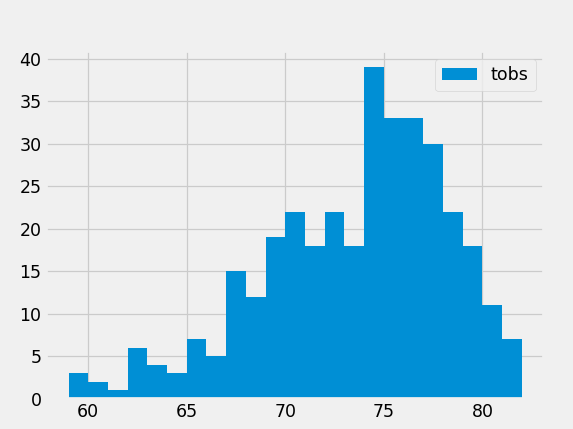

In [17]:
range_min = int(records_last_12['tobs'].min())
range_max = int(records_last_12['tobs'].max())

plt.figure(2)
plt.hist(x =records_last_12['tobs'], bins = list(range(range_min,range_max, 1)), label="tobs")
plt.legend()
plt.show()


In [18]:
# Write a function called `calc_temps` that will accept start date and end date 
# in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.date,func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        group_by(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(datetime.date(2012, 2, 28), 66.0, 70.375, 73.0), (datetime.date(2012, 2, 29), 69.0, 72.11111111111111, 74.0), (datetime.date(2012, 3, 1), 67.0, 71.11111111111111, 74.0), (datetime.date(2012, 3, 2), 66.0, 69.25, 74.0), (datetime.date(2012, 3, 3), 65.0, 69.71428571428571, 73.0), (datetime.date(2012, 3, 4), 65.0, 68.85714285714286, 73.0), (datetime.date(2012, 3, 5), 62.0, 65.0, 67.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacay_temps = calc_temps('2014-05-10', '2014-05-23')

<IPython.core.display.Javascript object>


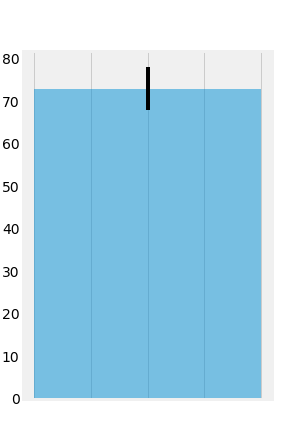

In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

error = vacay_temps[0][1] - vacay_temps[0][3]

figure(num=None, figsize=(4, 6), dpi=80, facecolor='w', edgecolor='k')

plt.figure(3)
plt.bar(0, vacay_temps[0][1], alpha=0.5, yerr = error)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid(axis = 'y')
plt.show()

In [21]:
def daily_normal_temps(start,end):
    """Daily Normals.
    Args:
        start & end date
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    query = session.query(
        Measurement.date,
        *sel
    ).group_by(
        Measurement.date    
    ).filter(
        Measurement.date >= a
    ).filter(
        Measurement.date <= b
    ).all()
    return query

In [22]:
a = '2014-05-10'
b = '2014-05-23'
normals = daily_normal_temps(a,b)

In [23]:
vacay_forecast = []
date
for row in normals:
    forecast_dict = {}
    forecast_dict['Date'] = row[0]
    forecast_dict['Min'] = row[1]
    forecast_dict['Avg'] = row[2]
    forecast_dict['Max'] = row[3]
    vacay_forecast.append(forecast_dict)

In [24]:
dates = []
mins = []
avgs = []
maxs = []

for row in normals:
    dates.append(row[0])
    mins.append(row[1])
    avgs.append(row[2])
    maxs.append(row[3])


vacay_forecast_df = pd.DataFrame({
    'Dates': dates,
    'Min': mins,
    'Avg': avgs,
    'Max': maxs
})

vacay_forecast_df['Dates'] = pd.to_datetime(vacay_forecast_df['Dates'])

vacay_forecast_df.head()

,Dates,Min,Avg,Max
0,2014-05-10,73.0,75.400000,78.0
1,2014-05-11,70.0,75.333333,79.0
2,2014-05-12,69.0,72.000000,74.0
3,2014-05-13,68.0,71.375000,75.0
4,2014-05-14,65.0,70.875000,76.0


In [25]:
x = vacay_forecast_df['Dates']
y1 , y2, y3 = [vacay_forecast_df['Min'], vacay_forecast_df['Avg'], vacay_forecast_df['Max'] ]

<IPython.core.display.Javascript object>


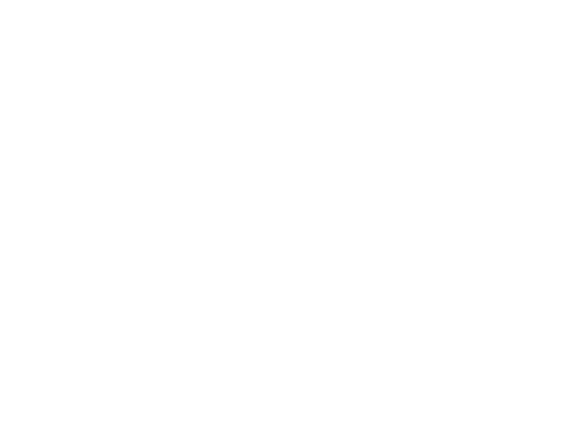

In [26]:
fig, ax = plt.subplots()
ax.plot(y1, label='Min'); ax.plot(y2, label='Avg'); ax.plot(y3, label='Max')

update = {'data':[{'fill': 'tozeroy'}]}  # this updates BOTH traces now
plotly_fig = tls.mpl_to_plotly( fig )
plotly_fig.update(update)
layout = go.Layout(showlegend=True)
fig = go.Figure(data = plotly_fig, layout = layout)

py.iplot(fig, filename='vacay_forecast')

In [ ]:
data = [go.Scatter(x= x, y1 = last_12.precipitation)]

layout = go.Layout(
    title='Past 12 Month Precipitation',
    xaxis=dict(
        title='Dates',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        showticklabels=True,
        tickangle=90
    ),
    yaxis=dict(
        title='Precipitation %',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [25]:
x = vacay_forecast_df['Dates']
y1 , y2, y3 = [vacay_forecast_df['Min'], vacay_forecast_df['Avg'], vacay_forecast_df['Max'] ]

In [28]:
# Create traces
trace0 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = x,
    y = y3,
    mode = 'lines+markers',
    name = 'lines'
)


data = [trace0, trace1, trace2]
py.iplot(data, filename='scatter-mode')